In [ ]:
df <- read.csv("/content/addicts.txt", sep = "\t")
head(df)

,prcod,intpla,sex,age,educat,curwor,asi1_med,asi2_emp,asi3_alc,asi4_dr,⋯,ha,se,cravin,rabdru,rubsex,gaf,bdi,sstati,end,endpo
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,4,1,0,18,1,1,0.19,0.70,0.120,0.30,⋯,1,0,4.6,1,4,55,25,60,0,5
2,2,2,1,30,4,1,0.44,0.23,0.006,0.27,⋯,0,0,9.7,4,5,55,39,50,0,5
3,2,1,0,23,2,0,0.50,1.00,0.300,0.30,⋯,0,0,9.5,6,1,45,29,55,0,2
4,4,1,0,20,2,1,0.00,0.80,0.050,0.26,⋯,1,0,2.7,11,4,40,28,58,0,5
5,3,2,0,20,2,0,0.00,0.75,0.780,0.23,⋯,0,0,3.0,19,4,40,28,58,0,2
6,1,1,0,24,2,0,0.52,0.50,0.100,0.30,⋯,0,0,10.0,3,2,41,33,68,0,2


Модель двухфакторного дисперсионного анализа

In [ ]:
model <- aov(bdi ~ curwor * st, data = df)
summary(model)

             Df Sum Sq Mean Sq F value Pr(>F)  
curwor        1    336   335.8   4.414 0.0366 *
st            1    112   112.1   1.474 0.2257  
curwor:st     1      5     5.5   0.072 0.7891  
Residuals   273  20765    76.1                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
3 observations deleted due to missingness

Значим эффект первого фактора. Эффект второго фактора и эффект взаимодействия не значимы.



In [ ]:
install.packages("psych")
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’




Статистики по категориям, объединяющим значения двух факторов

In [ ]:
describeBy(bdi ~ curwor + st, data = df, mat=TRUE, fast=TRUE)

,item,group1,group2,vars,n,mean,sd,median,min,max,range,skew,kurtosis,se
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bdi1,1,0,0,1,172,21.91279,8.752507,21,3,48,45,0.19118348,-0.2029379,0.6673724
bdi2,2,1,0,1,72,19.34722,7.825850,20,2,39,37,0.06237539,-0.2850493,0.9222853
bdi3,3,0,1,1,29,20.10345,10.519862,20,2,40,38,0.17988587,-0.8922550,1.9534893
bdi4,4,1,1,1,4,16.25000,8.539126,15,8,27,19,0.22359265,-2.1158246,4.2695628


Визуализируем

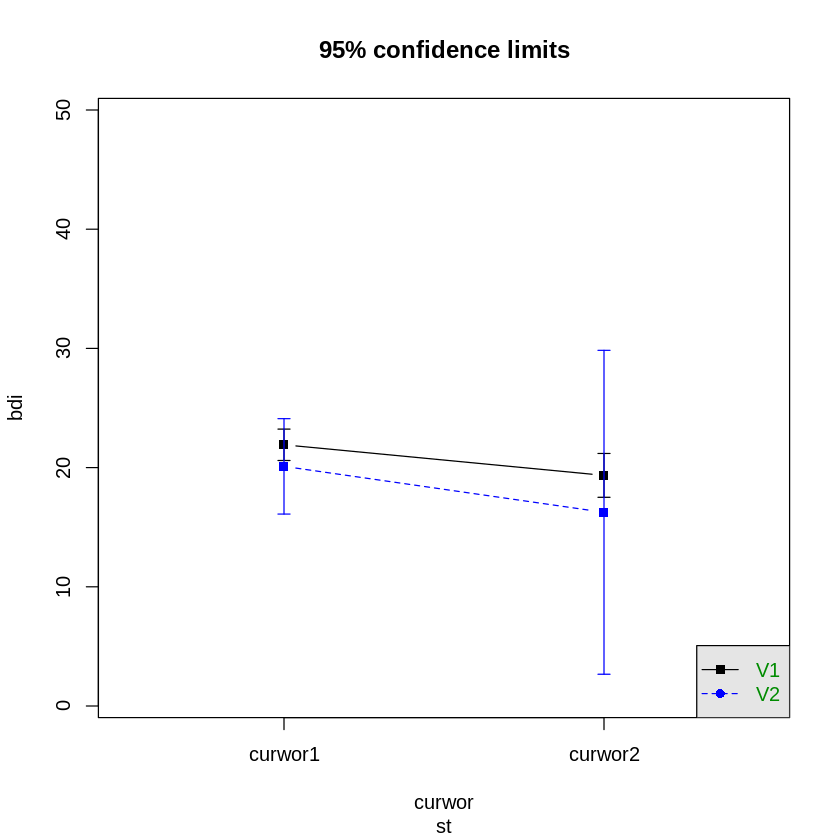

In [ ]:
error.bars.by(bdi ~ curwor + st, data = df, eyes = F, legend = 1)

# Дисперсионный анализ для повторяющихся наблюдений


In [ ]:
df <- read.csv("/content/data_ARM.csv")
df <- na.omit(df)
head(df)

,X,PRCOD.1,SEX.1,SSTATA.1,SSTATA.2,SSTATA.3
,<int>,<chr>,<chr>,<int>,<int>,<dbl>
2,2,Placebo+Framex,male,39,43,40
3,3,NLTX+Framex,female,48,51,48
4,4,Placebo+Framex,male,51,50,42
5,5,NLTX+Placebo,male,21,23,22
6,6,NLTX+Framex,female,54,30,35
7,7,NLTX+Framex,male,35,23,26


Выделим подгруппу с типом лечения `Placebo+Framex`.

In [ ]:
df <- df[df[, "PRCOD.1"] == "Placebo+Framex",]
head(df)

,X,PRCOD.1,SEX.1,SSTATA.1,SSTATA.2,SSTATA.3
,<int>,<chr>,<chr>,<int>,<int>,<dbl>
2,2,Placebo+Framex,male,39,43,40
4,4,Placebo+Framex,male,51,50,42
8,8,Placebo+Framex,male,32,46,31
13,13,Placebo+Framex,female,43,37,41
16,16,Placebo+Framex,male,65,56,52
25,25,Placebo+Framex,male,58,23,21


Узнаем количество индивидов разных полов.

In [ ]:
length(which(df$SEX.1 == "female"))
length(which(df$SEX.1 == "male"))

[1] 8

[1] 26

Объединим различные измерения SSTATA в одну переменную.

In [ ]:
df_new <- data.frame(stack(df[, 4:6]),
              X = as.factor(rep(df$X, 3)),
              SEX = as.factor(rep(df$SEX.1, 3)))
head(df_new)

,values,ind,X,SEX
,<dbl>,<fct>,<fct>,<fct>
1,39,SSTATA.1,2,male
2,51,SSTATA.1,4,male
3,32,SSTATA.1,8,male
4,43,SSTATA.1,13,female
5,65,SSTATA.1,16,male
6,58,SSTATA.1,25,male


Для дальнейших вычислений посчитаем средние (общее и по различным группам).

In [ ]:
mean_all <- mean(df_new$values) # общее
mean_sex <- tapply(X = df_new$values, INDEX = df_new$SEX, FUN = mean) # по полу
mean_ind <- tapply(X = df_new$values, INDEX = df_new$ind, FUN = mean) # по номеру измерения
mean_sex_ind <- tapply(X = df_new$values, INDEX = list(df_new$SEX, df_new$ind), FUN = mean) # по полу и номеру
mean_person <- tapply(X = df_new$values, INDEX = df_new$X, FUN = mean) # по индивиду

### Источники вариации

Выделим номера мужчин и женщин и средние

In [ ]:
women_pos <- df_new$SEX == "female"
women <- mean_person[women_pos]
men <- mean_person[!women_pos]

In [ ]:
Q <- (df_new$values - mean_all) %*% (df_new$values - mean_all) # общий
Q_A <- 3 * (length(which(df$SEX.1 == "female")) * (mean_sex[1] - mean_all)^2 + length(which(df$SEX.1 == "male"))*(mean_sex[2] - mean_all)^2)
Q_1e <- 3 * ((women[!is.na(women)] - mean_sex[1]) %*% (women[!is.na(women)] - mean_sex[1]) + (men[!is.na(men)] - mean_sex[2]) %*% (men[!is.na(men)] - mean_sex[2]))
Q_1 <- Q_1e + Q_A
Q_C <- length(df$X) * (mean_ind - mean_all) %*% (mean_ind - mean_all)
Q_AC <- length(which(df$SEX.1 == "female")) * (mean_sex_ind[1,] - mean_sex[1] - mean_ind + mean_all) %*% (mean_sex_ind[1,] - mean_sex[1] - mean_ind + mean_all) + length(which(df$SEX.1 == "male")) * (mean_sex_ind[2,] - mean_sex[2] - mean_ind + mean_all) %*% (mean_sex_ind[2,] - mean_sex[2] - mean_ind + mean_all)
Q_2 <- Q - Q_1
Q_err <- Q_2 - Q_C - Q_AC

2605.113


Степени свободы

In [ ]:
nu_1 <- length(df$X) - 1 # n-1
nu_A <- 2-1 # число различных полов - 1
nu_1e <- length(df$X) - 2 # n - значений фактора пола
nu_C <- 3 - 1 # число измерений во времени - 1
nu_AC <- (3 - 1) * (2 - 1)
nu_err <- (3 - 1) * (length(df$X) - 2)

### Проверка гипотезы, что все дифференциальные эффекты фактора пола равны нулю

In [ ]:
MQ_A <- Q_A / nu_A
MQ_1e <- Q_1e / nu_1e
F_A <- MQ_A / MQ_1e
print("Статистика для фактора пола:")
F_A
print("p-value:")
1-pf(F_A, nu_A, nu_1e)

[1] "Статистика для фактора пола:"


0.2976109


[1] "p-value:"


0.589167


Влияние фактора пола не значимо.

### Проверка гипотезы, что случайные эффекты фактора времени имеют нулевую дисперсию

In [ ]:
MQ_C <- Q_C / nu_C
MQ_AC <- Q_AC / nu_AC
F_C_r <- MQ_C / MQ_AC
print("Статистика для фактора времени:")
F_C_r
print("p-value:")
1-pf(F_C_r, nu_C, nu_AC)

[1] "Статистика для фактора времени:"


1.076847


[1] "p-value:"


0.4814992


Случайные эффекты фактора времени не значимы.

### Проверка гипотезы о фиксированных эффектах фактора времени

In [ ]:
MQ_err <- Q_err / nu_err
F_C_f <- MQ_C / MQ_err
print("Статистика для фактора времени:")
F_C_f
print("p-value:")
1-pf(F_C_f, nu_C, nu_err)

[1] "Статистика для фактора времени:"


5.419788


[1] "p-value:"


0.006692016


Фиксированные эффекты фактора времени значимы.

### Проверка эффекта взаимодействия

In [ ]:
F_int <- MQ_AC / MQ_err
print("Статистика для эффекта взаимодействия:")
F_int
print("p-value:")
1-pf(F_int, nu_AC, nu_err)

[1] "Статистика для эффекта взаимодействия:"


5.033017


[1] "p-value:"


0.009331431


Влияние фактора взаимодействия значимо.

Построим график.

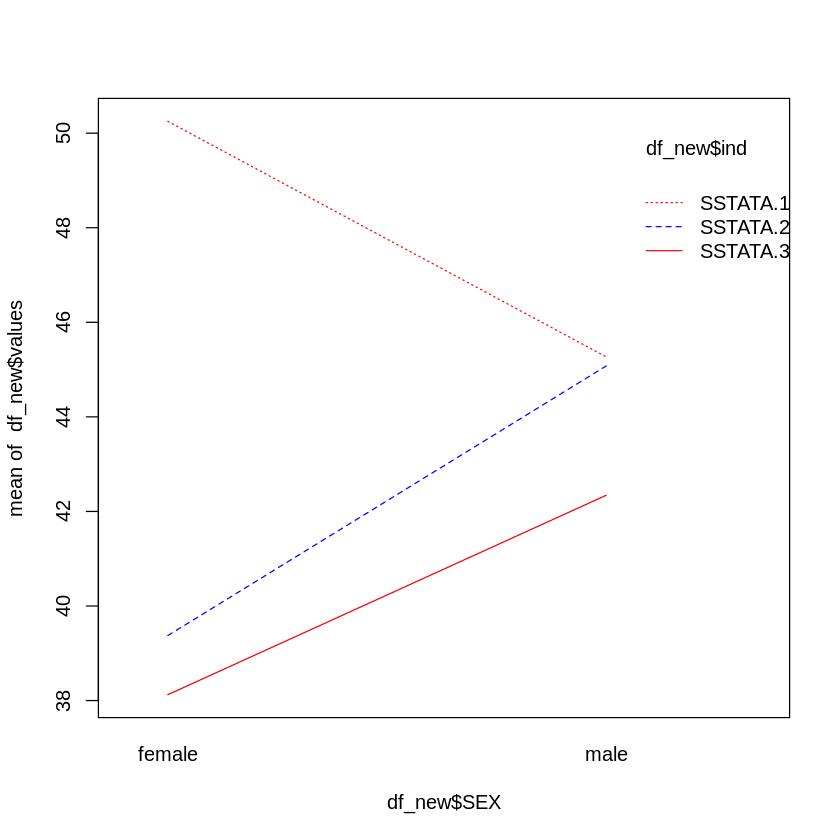

In [ ]:
interaction.plot(df_new$SEX, df_new$ind, df_new$values, col = c("red", "blue"))